In [ ]:
import pandas as pd


In [ ]:
import json

In [ ]:
import pandas as pd

# Read the JSON files into DataFrames
schedule = pd.read_json("/content/schedules.json")
train = pd.read_json("/content/trains.json")
station = pd.read_json("/content/stations.json")


In [ ]:
df = pd.concat([schedule, train, station], axis=0)

In [ ]:
# Extract station properties from 'features' column in stn DataFrame
station['state'] = station['features'].apply(lambda x: x['properties']['state'] if x and 'properties' in x else None)
station['code'] = station['features'].apply(lambda x: x['properties']['code'] if x and 'properties' in x else None)
station['name'] = station['features'].apply(lambda x: x['properties']['name'] if x and 'properties' in x else None)
station['zone'] = station['features'].apply(lambda x: x['properties']['zone'] if x and 'properties' in x else None)
station['address'] = station['features'].apply(lambda x: x['properties']['address'] if x and 'properties' in x else None)

In [ ]:
schedule = pd.merge(schedule, station[['code', 'name', 'zone', 'address']], left_on='station_code', right_on='code', how='left')

In [ ]:
# Extract train properties from 'features' column in train DataFrame
train['arrival_time'] = train['features'].apply(lambda x: x['properties']['arrival'] if x and 'properties' in x else None)
train['departure_time'] = train['features'].apply(lambda x: x['properties']['departure'] if x and 'properties' in x else None)
train['train_name'] = train['features'].apply(lambda x: x['properties']['name'] if x and 'properties' in x else None)
train['zone'] = train['features'].apply(lambda x: x['properties']['zone'] if x and 'properties' in x else None)
train['duration_h'] = train['features'].apply(lambda x: x['properties']['duration_h'] if x and 'properties' in x else None)
train['distance'] = train['features'].apply(lambda x: x['properties']['distance'] if x and 'properties' in x else None)
train['from_station_code'] = train['features'].apply(lambda x: x['properties']['from_station_code'] if x and 'properties' in x else None)
train['to_station_code'] = train['features'].apply(lambda x: x['properties']['to_station_code'] if x and 'properties' in x else None)

In [ ]:
# merge 2 df
schedule = pd.merge(schedule, train[['train_name', 'arrival_time', 'departure_time', 'zone', 'duration_h', 'distance', 'from_station_code', 'to_station_code']], left_on='train_name', right_on='train_name', how='left', suffixes=('_sch', '_train'))

In [ ]:
df = schedule


In [ ]:
df.shape

(718566, 19)

In [ ]:
df.head(2)


,arrival,day,train_name,station_name,station_code,id,train_number,departure,code,name,zone_sch,address,arrival_time,departure_time,zone_train,duration_h,distance,from_station_code,to_station_code
0,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00,FM,KACHEGUDA FALAKNUMA,None,None,06:10:00,05:00:00,SCR,1.0,37.0,FM,LPI
1,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00,FM,KACHEGUDA FALAKNUMA,None,None,06:55:00,05:40:00,SCR,1.0,37.0,FM,LPI


In [ ]:
schedule.isna().sum()

arrival                   0
day                   24054
train_name                0
station_name              0
station_code              0
id                        0
train_number              0
departure                 0
code                      0
name                      0
zone_sch             483165
address              483165
arrival_time              0
departure_time            0
zone_train                0
duration_h             2251
distance               2251
from_station_code         0
to_station_code           0
dtype: int64

In [ ]:
schedule.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718566 entries, 0 to 718565
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   arrival            718566 non-null  object 
 1   day                694512 non-null  float64
 2   train_name         718566 non-null  object 
 3   station_name       718566 non-null  object 
 4   station_code       718566 non-null  object 
 5   id                 718566 non-null  int64  
 6   train_number       718566 non-null  object 
 7   departure          718566 non-null  object 
 8   code               718566 non-null  object 
 9   name               718566 non-null  object 
 10  zone_sch           235401 non-null  object 
 11  address            235401 non-null  object 
 12  arrival_time       718566 non-null  object 
 13  departure_time     718566 non-null  object 
 14  zone_train         718566 non-null  object 
 15  duration_h         716315 non-null  float64
 16  di

In [ ]:
# Fill missing values in 'zone_sch' and 'zone_train' with 'Unknown'
schedule['zone_sch'] = schedule['zone_sch'].fillna('Unknown')
schedule['zone_train'] = schedule['zone_train'].fillna('Unknown')

In [ ]:
schedule['address'] = schedule['address'].fillna('Unknown')

In [ ]:
mean_duration_h = schedule['duration_h'].mean()
mean_distance = schedule['distance'].mean()

schedule['duration_h'] = schedule['duration_h'].fillna(mean_duration_h)
schedule['distance'] = schedule['distance'].fillna(mean_distance)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

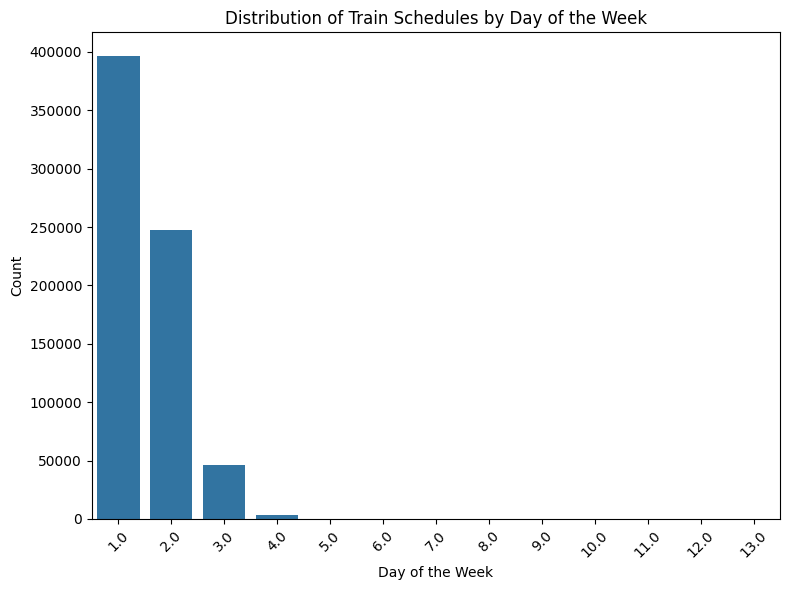

In [ ]:
# Explore distribution of train schedules based on day of the week
day_counts = schedule['day'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Distribution of Train Schedules by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

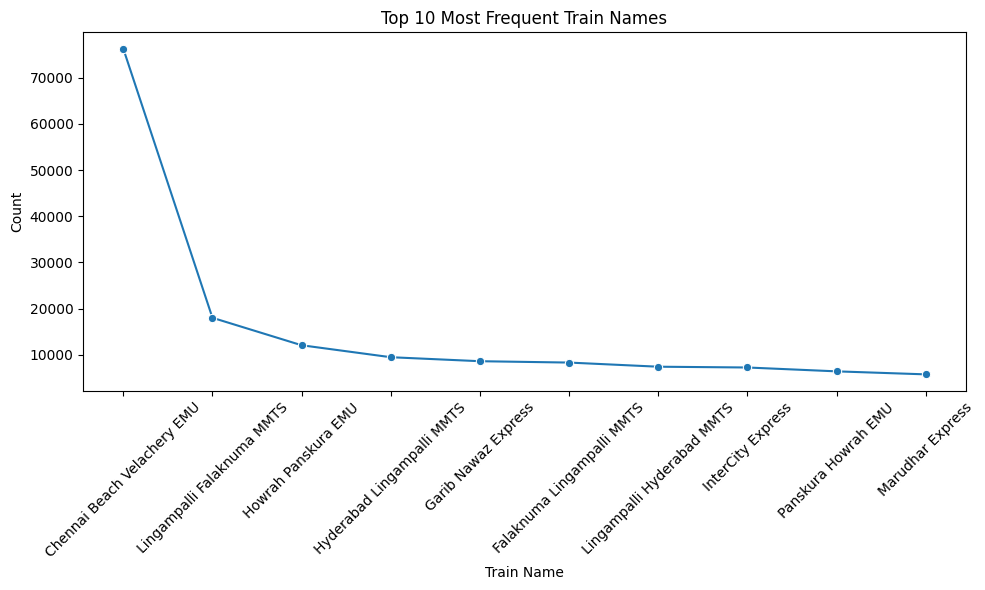

In [ ]:
# Visualize trends and patterns in train schedules using line plot
train_counts = schedule['train_name'].value_counts().head(10)  # Top 10 most frequent train names
plt.figure(figsize=(10, 6))
sns.lineplot(x=train_counts.index, y=train_counts.values, marker='o')
plt.title('Top 10 Most Frequent Train Names')
plt.xlabel('Train Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

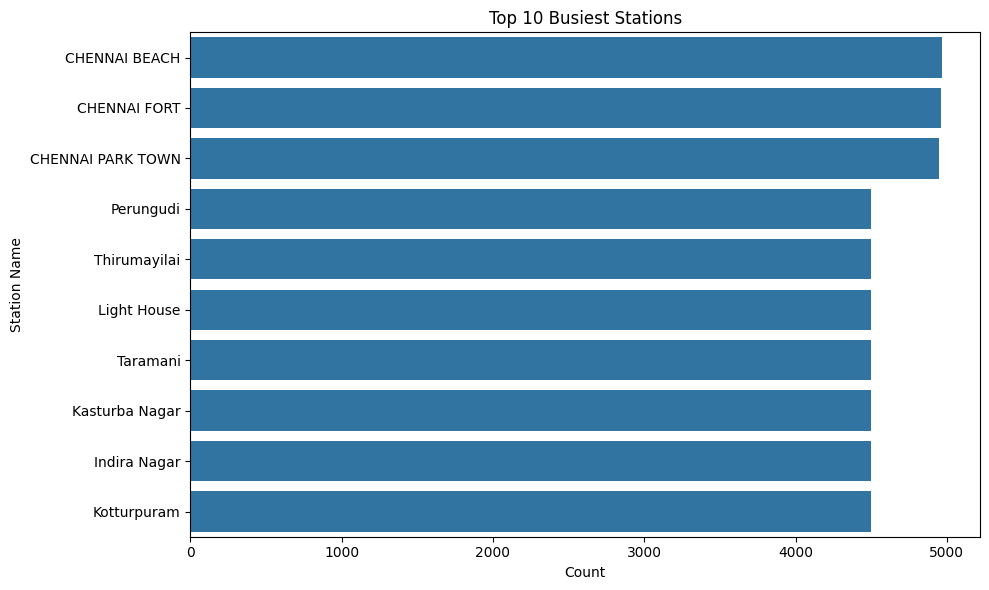

In [ ]:
# Explore distribution of train schedules based on station name
station_counts = schedule['station_name'].value_counts().head(10)  # Top 10 busiest stations
plt.figure(figsize=(10, 6))
sns.barplot(x=station_counts.values, y=station_counts.index, orient='h')
plt.title('Top 10 Busiest Stations')
plt.xlabel('Count')
plt.ylabel('Station Name')
plt.tight_layout()
plt.show()

In [ ]:
# Convert 'arrival_time' and 'departure_time' columns to datetime format with explicit format specification
schedule['arrival_time'] = pd.to_datetime(schedule['arrival_time'], format='%H:%M:%S', errors='coerce')
schedule['departure_time'] = pd.to_datetime(schedule['departure_time'], format='%H:%M:%S', errors='coerce')

# Drop rows where conversion to datetime failed (e.g., if there are invalid time strings)
schedule.dropna(subset=['arrival_time', 'departure_time'], inplace=True)

# Create 'time_of_day' feature based on arrival time
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

schedule['time_of_day'] = schedule['arrival_time'].dt.hour.apply(get_time_of_day)

# Create 'is_peak_hour' feature based on arrival time
def is_peak_hour(hour):
    return 7 <= hour <= 9 or 17 <= hour <= 19  # Assuming peak hours are 7-9 AM and 5-7 PM

schedule['is_peak_hour'] = schedule['arrival_time'].dt.hour.apply(is_peak_hour).astype(int)

# Create 'travel_duration' feature
schedule['travel_duration'] = (schedule['arrival_time'] - schedule['departure_time']).dt.total_seconds() / 3600  # Convert to hours


In [ ]:
schedule.head(4)

,arrival,day,train_name,station_name,station_code,id,train_number,departure,code,name,...,arrival_time,departure_time,zone_train,duration_h,distance,from_station_code,to_station_code,time_of_day,is_peak_hour,travel_duration
0,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00,FM,KACHEGUDA FALAKNUMA,...,1900-01-01 06:10:00,1900-01-01 05:00:00,SCR,1.0,37.0,FM,LPI,Morning,0,1.166667
1,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00,FM,KACHEGUDA FALAKNUMA,...,1900-01-01 06:55:00,1900-01-01 05:40:00,SCR,1.0,37.0,FM,LPI,Morning,0,1.250000
2,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00,FM,KACHEGUDA FALAKNUMA,...,1900-01-01 07:40:00,1900-01-01 06:25:00,SCR,1.0,37.0,FM,LPI,Morning,1,1.250000
3,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00,FM,KACHEGUDA FALAKNUMA,...,1900-01-01 08:20:00,1900-01-01 07:10:00,SCR,1.0,37.0,FM,LPI,Morning,1,1.166667


In [ ]:
# Extract hour and minute components from 'arrival_time'
schedule['arrival_hour'] = schedule['arrival_time'].dt.hour
schedule['arrival_minute'] = schedule['arrival_time'].dt.minute

# Extract hour and minute components from 'departure_time'
schedule['departure_hour'] = schedule['departure_time'].dt.hour
schedule['departure_minute'] = schedule['departure_time'].dt.minute

In [ ]:
schedule.columns

Index(['arrival', 'day', 'train_name', 'station_name', 'station_code', 'id',
       'train_number', 'departure', 'code', 'name', 'zone_sch', 'address',
       'arrival_time', 'departure_time', 'zone_train', 'duration_h',
       'distance', 'from_station_code', 'to_station_code', 'time_of_day',
       'is_peak_hour', 'travel_duration', 'arrival_hour', 'arrival_minute',
       'departure_hour', 'departure_minute'],
      dtype='object')

In [ ]:
schedule.to_csv('df.csv', index=True)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/df.csv")

In [ ]:
df.head(3)

,Unnamed: 0,arrival,day,train_name,station_name,station_code,id,train_number,departure,code,...,distance,from_station_code,to_station_code,time_of_day,is_peak_hour,travel_duration,arrival_hour,arrival_minute,departure_hour,departure_minute
0,0,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00,FM,...,37.0,FM,LPI,Morning,0,1.166667,6,10,5,0
1,1,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00,FM,...,37.0,FM,LPI,Morning,0,1.250000,6,55,5,40
2,2,None,1.0,Falaknuma Lingampalli MMTS,KACHEGUDA FALAKNUMA,FM,302214,47154,07:55:00,FM,...,37.0,FM,LPI,Morning,1,1.250000,7,40,6,25


In [ ]:
df.shape

(716315, 27)

In [ ]:
df.columns

Index(['Unnamed: 0', 'arrival', 'day', 'train_name', 'station_name',
       'station_code', 'id', 'train_number', 'departure', 'code', 'name',
       'zone_sch', 'address', 'arrival_time', 'departure_time', 'zone_train',
       'duration_h', 'distance', 'from_station_code', 'to_station_code',
       'time_of_day', 'is_peak_hour', 'travel_duration', 'arrival_hour',
       'arrival_minute', 'departure_hour', 'departure_minute'],
      dtype='object')

Enoding

In [ ]:
cat_col = df.select_dtypes(include=['object']).columns.tolist()
print(cat_col)

['arrival', 'train_name', 'station_name', 'station_code', 'train_number', 'departure', 'code', 'name', 'zone_sch', 'address', 'arrival_time', 'departure_time', 'zone_train', 'from_station_code', 'to_station_code', 'time_of_day']


In [ ]:
len(cat_col)

16

In [ ]:
cat_cols = ['arrival', 'train_name', 'station_name', 'station_code', 'train_number', 'departure', 'code', 'name', 'zone_sch', 'address', 'arrival_time', 'departure_time', 'zone_train', 'from_station_code', 'to_station_code', 'time_of_day']

for col in cat_cols:
    unique_values = df[col].nunique()
    print(f"'{col}',  {unique_values}.")

'arrival',  1441.
'train_name',  3933.
'station_name',  8493.
'station_code',  8538.
'train_number',  5193.
'departure',  1441.
'code',  8538.
'name',  8493.
'zone_sch',  19.
'address',  2716.
'arrival_time',  369.
'departure_time',  349.
'zone_train',  18.
'from_station_code',  724.
'to_station_code',  730.
'time_of_day',  4.


In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
# Define the categorical columns
cat_cols = ['arrival', 'train_name', 'station_name', 'station_code', 'train_number',
            'departure', 'code', 'name', 'zone_sch', 'address', 'arrival_time',
            'departure_time', 'zone_train', 'from_station_code', 'to_station_code',
            'time_of_day']

# Assuming df is your DataFrame containing these categorical columns
# Perform binary encoding
encoder = ce.BinaryEncoder(cols=cat_cols)
df1 = encoder.fit_transform(df)

In [ ]:
df1.head(3)

,Unnamed: 0,arrival_0,arrival_1,arrival_2,arrival_3,arrival_4,arrival_5,arrival_6,arrival_7,arrival_8,...,to_station_code_9,time_of_day_0,time_of_day_1,time_of_day_2,is_peak_hour,travel_duration,arrival_hour,arrival_minute,departure_hour,departure_minute
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1.166667,6,10,5,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1.250000,6,55,5,40
2,2,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1.250000,7,40,6,25


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716315 entries, 0 to 716314
Columns: 177 entries, Unnamed: 0 to departure_minute
dtypes: float64(4), int64(173)
memory usage: 967.3 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716315 entries, 0 to 716314
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         716315 non-null  int64  
 1   arrival            716315 non-null  object 
 2   day                693260 non-null  float64
 3   train_name         716307 non-null  object 
 4   station_name       716313 non-null  object 
 5   station_code       716315 non-null  object 
 6   id                 716315 non-null  int64  
 7   train_number       716315 non-null  object 
 8   departure          716315 non-null  object 
 9   code               716315 non-null  object 
 10  name               716313 non-null  object 
 11  zone_sch           716315 non-null  object 
 12  address            715529 non-null  object 
 13  arrival_time       716315 non-null  object 
 14  departure_time     716315 non-null  object 
 15  zone_train         716315 non-null  object 
 16  du

In [ ]:
print(df.shape)
print(df1.shape)

(716315, 27)
(716315, 177)


In [ ]:
df2 = pd.merge(df, df1, left_index=True, right_index=True)
print(df2.shape)
print(df2.columns)

(716315, 204)
Index(['Unnamed: 0_x', 'arrival', 'day_x', 'train_name', 'station_name',
       'station_code', 'id_x', 'train_number', 'departure', 'code',
       ...
       'to_station_code_9', 'time_of_day_0', 'time_of_day_1', 'time_of_day_2',
       'is_peak_hour_y', 'travel_duration_y', 'arrival_hour_y',
       'arrival_minute_y', 'departure_hour_y', 'departure_minute_y'],
      dtype='object', length=204)


In [ ]:
df2.isna().sum()

Unnamed: 0_x              0
arrival                   0
day_x                 23055
train_name                8
station_name              2
                      ...  
travel_duration_y         0
arrival_hour_y            0
arrival_minute_y          0
departure_hour_y          0
departure_minute_y        0
Length: 204, dtype: int64

In [ ]:
# Forward fill missing values
df2 = df2.fillna(method='ffill')

# Backward fill missing values
df2 = df2.fillna(method='bfill')

In [ ]:
df2.isna().sum()

Unnamed: 0_x          0
arrival               0
day_x                 0
train_name            0
station_name          0
                     ..
travel_duration_y     0
arrival_hour_y        0
arrival_minute_y      0
departure_hour_y      0
departure_minute_y    0
Length: 204, dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716315 entries, 0 to 716314
Columns: 204 entries, Unnamed: 0_x to departure_minute_y
dtypes: float64(8), int64(180), object(16)
memory usage: 1.1+ GB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df2.to_csv('df3.csv', index=True)